## Municipal Financial Reports

### This document explores data collected from the Department of Community and Economic Development of Pennsylvania.
### We determine what the average municipal expenditure on 

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from random import randrange
import warnings
import math
warnings.filterwarnings("ignore")

In [15]:
# Load DCED data from csv file
Municipality_financials = pd.read_csv("ALLEGHENY_REPORTS.csv")
#Municipal_2020  = Municipality_financials[Municipality_financials["Year"] == 2020]
Municipality_financials.head()
#print(list(Municipality_financials.columns))

,COG,Municipality,Year,Real.Estate.Taxes,Occupation.Taxes,Residence.Taxes,Regional.Asset.District.Sales.Tax,Per.Capita.Taxes,Real.Estate.Transfer.Taxes,Earned.Income.Taxes,...,Insurance.Casualty.and.Surety,Fiduciary.Fund.Benefits.and.Refunds,A.O.Unclassified.Expenditures,Refund.of.Prior.Year.Revenues,Interfund.Operating.Transfers.Expend,A.O.Financing.Uses,Total.Expenditure,sum.code.enf,per.it.data,per.code.enf
0,QUAKER VALLEY,ALEPPO TWP,2006,576823,0,0,19134,0,33101,109285,...,27633,0,0,295,34562.0,0,1489357,24910,0.168,1.673
1,QUAKER VALLEY,ALEPPO TWP,2007,566609,0,0,21067,0,151653,127877,...,27877,0,0,9846,310175.0,0,1521115,12321,0.131,0.810
2,QUAKER VALLEY,ALEPPO TWP,2008,525981,0,0,18776,0,25035,153522,...,27407,0,0,6722,100000.0,0,1197174,21594,1.715,1.804
3,QUAKER VALLEY,ALEPPO TWP,2009,574683,0,0,19009,0,29496,153575,...,27812,0,0,2018,100000.0,0,1337536,19320,0.308,1.444
4,QUAKER VALLEY,ALEPPO TWP,2010,540612,0,0,18924,0,32642,172185,...,27501,0,0,355,130000.0,0,1483605,36416,0.000,2.455


In [128]:
# Extract data related to municipality revenue and money spent on related infrastructure

Muni_fin_2 = Municipality_financials.loc[:, ['Year','Municipality','Total.Taxes', 'PA.Grant.Highways.and.Streets', 
                                          'Maintenance.n.Repairs.Roads.Bridges', 'Sidewalks.and.Crosswalks', 
                                          'Highway.Construction.and.Rebuilding.Projects']]
Muni_fin_2.head()

,Year,Municipality,Total.Taxes,PA.Grant.Highways.and.Streets,Maintenance.n.Repairs.Roads.Bridges,Sidewalks.and.Crosswalks,Highway.Construction.and.Rebuilding.Projects
0,2006,ALEPPO TWP,802802.0,0.0,0,0,391563.0
1,2007,ALEPPO TWP,959018.0,8730.0,4000,0,169852.0
2,2008,ALEPPO TWP,800915.0,9476.0,3725,0,0.0
3,2009,ALEPPO TWP,859577.0,10195.0,5636,0,0.0
4,2010,ALEPPO TWP,864368.0,14222.0,225706,0,0.0


df5 =  
              Municipality  MeanRoadBridgeRepair
0              ALEPPO TWP          46616.866667
1          ASPINWALL BORO          15149.466667
2             AVALON BORO          73348.800000
3            BALDWIN BORO         744090.400000
5         BELL ACRES BORO          37626.333333
6           BELLEVUE BORO         121809.285714
7   BEN AVON HEIGHTS BORO          43709.200000
9            BLAWNOX BORO          11778.666667
10      BRACKENRIDGE BORO           5737.866667
11          BRADDOCK BORO          14782.333333


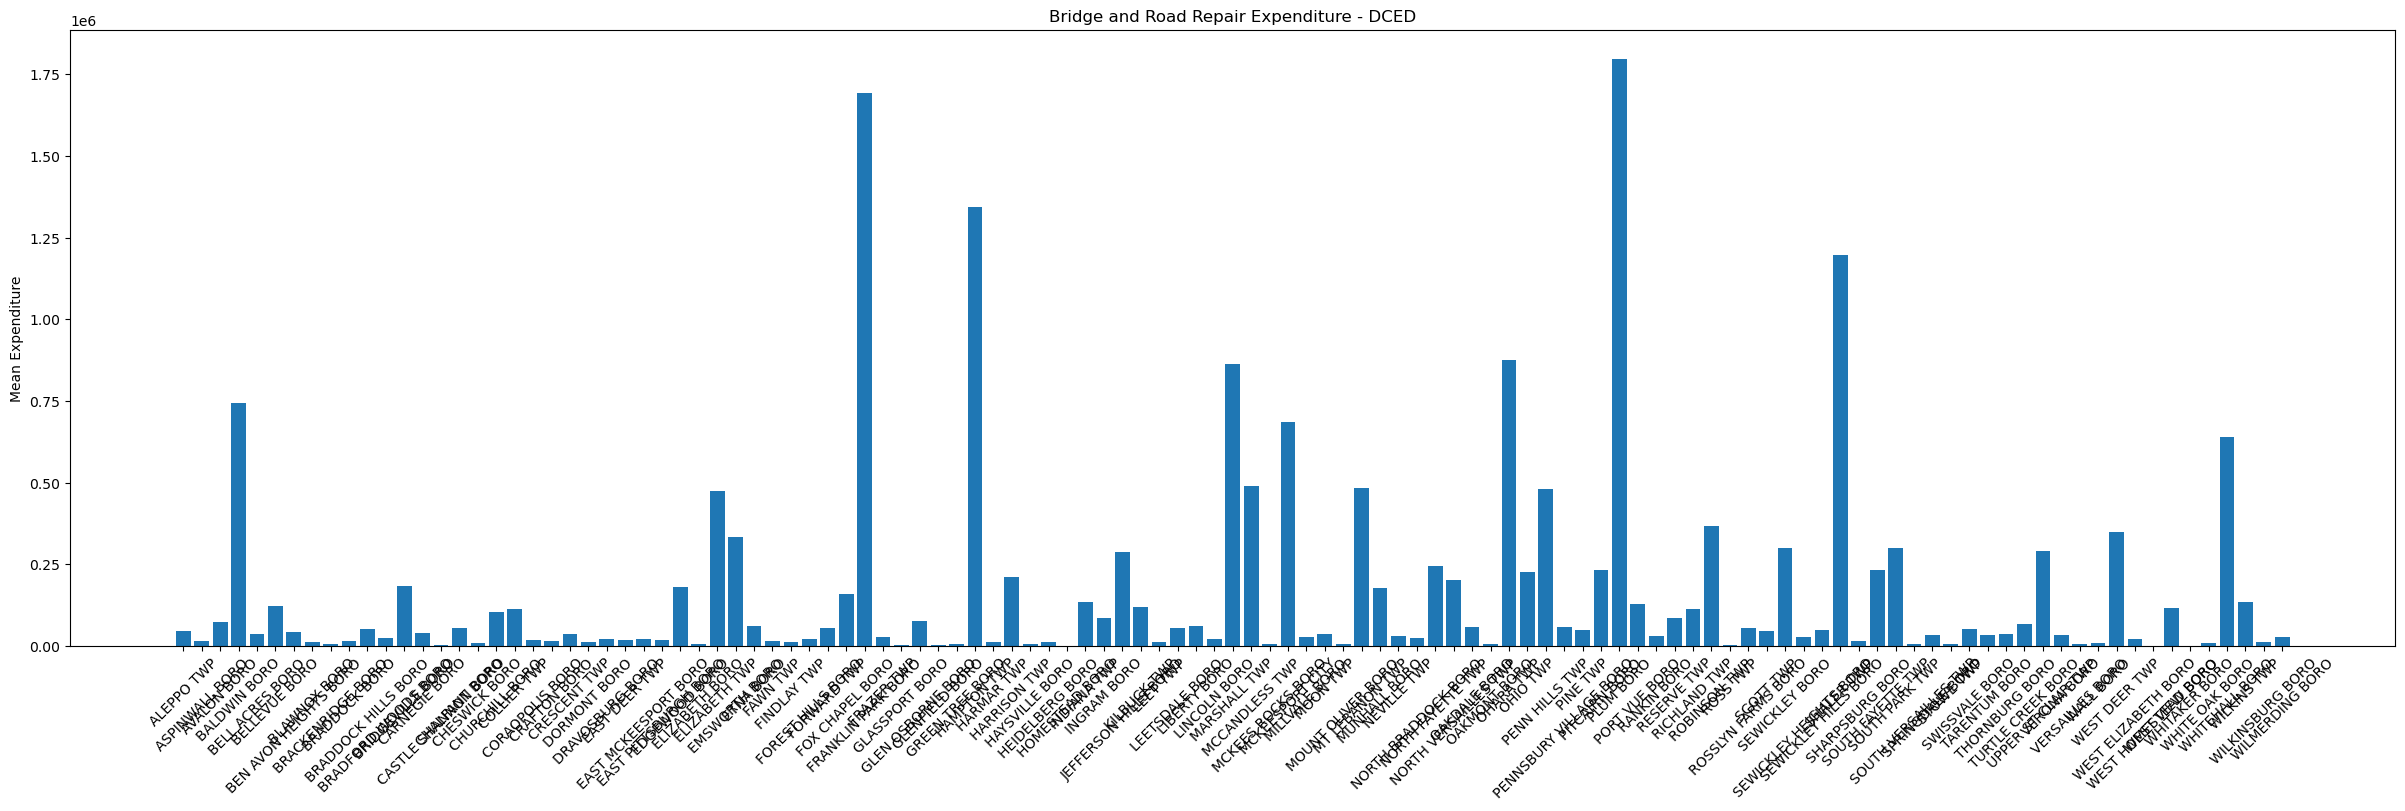

In [133]:
#Plot the average money spent on maintenance and repairs of roads and bridges 
df4 = Muni_fin_2.loc[:, ['Municipality', 'Maintenance.n.Repairs.Roads.Bridges']]
#print(df4['Municipality'].unique())

drop_vals = ['2006','2007','2008','2009', '2010', '2011', '2012', '2013', '2014',
             '2015', '2016', '2017','2018','2019','2020']

for value in drop_vals:
    df4.drop(df4[df4['Municipality'] == value].index, inplace = True)
                 
#print('df4 = ', '\n', df4.head( n = 10))
#print(df4['Municipality'].unique())

df5 = df4.groupby(['Municipality'], as_index=False, sort=False)['Maintenance.n.Repairs.Roads.Bridges'].mean()
#print(list(df5.columns))
df5.rename(columns={"Maintenance.n.Repairs.Roads.Bridges":"MeanRoadBridgeRepair"}, inplace=True)
df5.drop(df5[df5['MeanRoadBridgeRepair'] == 0].index, inplace = True)

df6 = df4.groupby(['Municipality'], as_index=False, sort=False)['Maintenance.n.Repairs.Roads.Bridges'].std()
df6.rename(columns={"Maintenance.n.Repairs.Roads.Bridges":"StandardDev"}, inplace=True)

print('df5 = ', '\n', df5.head( n = 10))

#print('df6 = ', '\n', df6.head( n = 10))
#df.head()
plt.figure(figsize=(30,8))
plt.bar(df5['Municipality'], df5['MeanRoadBridgeRepair'])
plt.xticks(rotation = 45) 
plt.title('Bridge and Road Repair Expenditure - DCED')
plt.ylabel('Mean Expenditure')
plt.show()

In [122]:
#If 'diff' is positive, this indicates the municipality spent more money on infrastructure than what they got from 
#grants, indicating they spent 'municipality' money
Muni_fin_2["diff"] = (Muni_fin_2["Sidewalks.and.Crosswalks"] + 
                       Muni_fin_2["Highway.Construction.and.Rebuilding.Projects"] +
                       Muni_fin_2["Maintenance.n.Repairs.Roads.Bridges"] -
                       Muni_fin_2["PA.Grant.Highways.and.Streets"])
                            


In [123]:
Muni_fin_2.loc[:, ['Municipality', 'Year','diff']]

,Municipality,Year,diff
0,ALEPPO TWP,2006,391563.0
1,ALEPPO TWP,2007,165122.0
2,ALEPPO TWP,2008,-5751.0
3,ALEPPO TWP,2009,-4559.0
4,ALEPPO TWP,2010,211484.0
...,...,...,...
3801,WILMERDING BORO,2016,117962.0
3802,WILMERDING BORO,2017,64503.0
3803,WILMERDING BORO,2018,0.0
3804,WILMERDING BORO,2019,45692.0


In [29]:
spent_more_than_grant = Municipal_2020_2[Municipal_2020_2["diff"] < 0]
len(spent_more_than_grant["Municipality"].unique())  #number of municpalities that spent their 'own' money on infrastructure

88